In [2]:
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

# Granularity

The term **data granularity** refers to the level of detail captured in the data. It's easiest to show you what we mean through an example.

The Global Monitoring Laboratory (GML) conducts research on the atmosphere. For instance, the GML has a station at Mauna Loa in Hawaii that measures carbon dioxide (CO2) levels [^mlo]. Here's a picture from their website:

```{image} mlo.jpeg
:alt: Picture of the Mauna Loa Observatory in Hawaii
:align: center
```

The CO2 data is available on the GML website [^mlo_data]. We've downloaded the data and loaded it into Python:

In [3]:
co2 = pd.read_csv('data/co2_mm_mlo.txt', header = None, skiprows = 72, 
                  sep = '\s+',
                  names = ['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'days'])

In [4]:
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


It actually takes a bit of work to get the data into Python properly. We'll return to this data in the Data Quality chapter. For now, take a closer look at each row in the `co2` data table. What does a row of the table represent?

Notice that the `Yr` and `Mo` columns contain years and months. And, there are multiple measurements for each year. You might have also guessed that there is only one measurement per month within a year, implying that each row of the table represents the readings for a month. To check these guesses, you'd look at the data description, which states:

> The "average" column contains the monthly mean CO2 mole fraction determined from daily averages.

So, you see that each row of the data table represents a month. But the actual measurements from the research station happen more frequently. In fact, the GML website has datasets for daily and hourly measurements too [^mlo_hourly].

You might already see some asymmetry here. We can go from hourly recordings to daily averages but not the other way around. We say that the hourly data has a finer granularity than the daily data. And, the daily data has a coarser granularity than the hourly data. You use **aggregation** to go to a coarser granularity --- in `pandas`, you would use `.groupby()` and `.agg()`. But you usually can't go to a finer granularity.

So why not always just use the data with the finest granularity available? On a computational level, very fine-grained data can become very large. The Mauna Loa Observatory started recording CO2 levels in 1958. Imagine how many rows the data table would contain if they took measurements every single second! But more importantly, you want the granularity of the data to match your research question. Suppose you want to see whether CO2 levels have risen over time, consistent with global warming predictions. You don't need a CO2 measurement every second. In fact, you would probably want yearly data, which makes this plot: 

In [12]:
# Remove missing data
co2 = co2.query('Avg > 0')

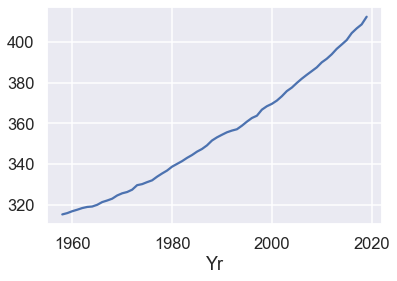

In [14]:
(co2.groupby('Yr')
 ['Avg']
 .mean()
 .plot()
);

What happens if you decide to use monthly data instead? Here's a plot:

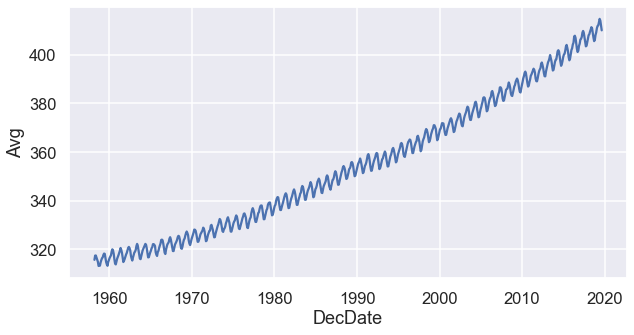

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='DecDate', y='Avg', data=co2);

You can see that there is seasonality to the CO2 levels --- within a single year, the CO2 rises and falls. But, the long-term increase in CO2 levels is apparent.

## Granularity Checklist

You should have answers to the following questions after looking at the granularity of your datasets.

**What does a record represent?**

In the `co2` table, each record represents a month of CO2 readings.

**Do all records capture granularity at the same level? (Sometimes a table will contain summary rows.)**

Yes, for the `co2` table.

**If the data were aggregated, how was the aggregation performed? Sampling and averaging are are common aggregations.**

According to the data description, each record is the mean of daily readings. But, the data website also has hourly readings, so we suspect that both daily and monthly readings are aggregated from the hourly readings.

**What kinds of aggregations can we perform on the data?**

Time series data like the `co2` data allow for many useful aggregations. We've already aggregated the monthly data into yearly averages. If we wanted to examine the seasonality in more detail, we could aggregate the data by the day within a month (1-31).

[^mlo]: [https://www.esrl.noaa.gov/gmd/obop/mlo/](https://www.esrl.noaa.gov/gmd/obop/mlo/)
[^mlo_data]: [https://www.esrl.noaa.gov/gmd/ccgg/trends/mlo.html](https://www.esrl.noaa.gov/gmd/ccgg/trends/mlo.html)
[^mlo_hourly]: [https://www.esrl.noaa.gov/gmd/dv/data/index.php?category=Greenhouse%2BGases&parameter_name=Carbon%2BDioxide&site=MLO](https://www.esrl.noaa.gov/gmd/dv/data/index.php?category=Greenhouse%2BGases&parameter_name=Carbon%2BDioxide&site=MLO)